# **Praktikum I Machine Learning dan Modern Prediction**

'''
=================================================

Nama  : Lutfiah Firlian

NPM : F1F022025

**Feature Engineering**
=================================================
'''

# **Latar Belakang**

Machine Learning (ML) merupakan studi ilmiah yang mempelajari algoritma dan model statistik yang digunakan pada sistem komputer untuk melakukan tugas tertentu tanpa pemrograman eksplisit (Mitchell, 1997). ML memiliki berbagai metode yang dapat digunakan untuk menangani proses klasifikasi, clustering, dan pengelolaan data lainnya. Beberapa penelitian telah menerapkan berbagai algoritma, di antaranya Naïve Bayes dan Random Forest, yang terbukti efektif dalam meningkatkan akurasi hasil analisis (Baharuddin & Tjahjanto, 2022).

Namun, sebelum dilakukan proses pemodelan, data mentah pada umumnya perlu melalui tahap persiapan karena sering kali masih mengandung noise, data hilang, atau keberadaan outlier yang dapat memengaruhi hasil analisis (Domingos, 2012). Oleh karena itu, diperlukan proses feature engineering untuk mengubah data mentah menjadi data yang lebih siap diolah oleh algoritma machine learning (Brownlee, 2020).

Feature engineering melibatkan berbagai tahapan, seperti data cleaning, normalisasi, standarisasi, encoding, dan transformasi data lainnya (Liu & Motoda, 1998). Proses ini dilakukan agar model dapat mengenali pola dengan lebih baik serta meningkatkan performa prediksi dari analisis yang dilakukan (Zheng et al., 2020). Tanpa feature engineering yang tepat, algoritma pembelajaran yang digunakan tidak akan mampu menghasilkan prediksi dengan performa yang optimal (Kuhn & Johnson, 2020).

Pada penelitian ini akan dilakukan analisis terhadap data yang mencakup variabel curah hujan, suhu udara, kelembapan, keadaan cuaca, dan kecepatan angin, dengan total 734 observasi untuk masing-masing variabel. Sebelum dilakukan analisis lebih lanjut, data tersebut akan melalui tahap pemeriksaan dan persiapan menggunakan proses feature engineering untuk memastikan kualitas data yang optimal bagi model machine learning.

# **Rumusan Masalah**

Adapun ruumusan masalah pada pertemuan ini adalah:
1.   Bagaimana cara memahami konsep dari berbagai jenis feature engineering pada phyton?
2.   Bagaimaana melakukan teknik feature engineering di program Python?

# **Tujuan Penelitian**


Berdasarkan rumusan masalah maka didapatkan tujuan dari penelitian adalah sebagai berikut:
1.   Mahasiswa mampu memahami konsep dari berbagai jenis feature engineering pada phyton
2.   Mahasiswa mampu melakukan teknik feature engineering di program Phyton



# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [182]:
!pip install feature_engine

In [183]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [184]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [185]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [186]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

### Penanganan Data Missing

#### -Imputasi Missing Data

Imputasi kali ini digunakan pada data kecepatan angin dan keadaan cuaca, karena kedua variabel memiliki missing value. Pada data kecepatan angin akan dilakukan imputasi dengan menggunakan mean, dimana data hilang akan digantikan dengan rata-rata data yang ada. Pada data keadaan cuaca akan digunakan interpolasi dengan mengisi nilai hilang berdasarkan tren dari data sekitar.

In [187]:
df_imp2 = data_pt1.copy()

# --- Imputasi Mean untuk 'Kecepatan Angin' ---
mean_angin = df_imp2['Kecepatan Angin'].mean()
df_imp2['Kecepatan Angin'] = df_imp2['Kecepatan Angin'].fillna(mean_angin)

# --- Imputasi Interpolasi untuk 'Keadaan Cuaca' ---
df_imp2['Keadaan Cuaca'] = df_imp2['Keadaan Cuaca'].interpolate(method='linear')

print(df_imp2.isnull().sum())

Hujan              0
Suhu Udara         0
Kelembapan         0
Keadaan Cuaca      0
Kecepatan Angin    0
dtype: int64


In [188]:
df_imp4=df_imp2.copy()

## B - Kardinalitas

Kardinalitas kali ini digunakan pada data keadaan cuaca, dimana akan dikurangi kardinalitas untuk menyederhanakan jumlah unik pada variabel tersebut. Kardinalitas bekerja dnegan memasukkan observasi-observasi yang ada ke dalam beberpa interval, maka jumlah dari kategori akan berkurang.

In [189]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.655012
1,1,24.0,90,1.0,6.655012
2,1,26.8,77,1.0,6.655012
3,1,29.6,62,2.0,2.000000
4,1,30.8,56,1.0,7.000000
5,1,31.0,55,1.0,7.000000
6,1,30.4,57,3.0,9.000000
7,2,30.9,58,2.0,10.000000
8,2,30.2,62,2.0,8.000000
9,2,29.7,62,2.0,7.000000


In [190]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5. ,  1. ,  2. ,  3. , 14. , 60. , 61. , 21. , 29. , 10. , 16. ,
       62. , 63. , 65. , 15. , 17. , 13. , 95. , 91. , 49. , 97. , 56. ,
        1.5])

In [191]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
204      1        24.4          97           61.0         3.000000   
602      2        28.3          73            2.0         3.000000   
723      2        29.0          68            2.0         6.000000   
545      2        23.2          97            2.0         6.655012   
208      1        23.5          97           61.0         6.655012   
536      1        28.4          81            2.0         9.000000   
219      1        28.6          72            2.0         7.000000   
607      2        29.1          74            3.0        10.000000   
732      2        27.2          83           15.0         5.000000   
411      2        30.2          62            1.0         6.000000   

    Keadaan_Cuaca_reduced  
204                     6  
602                     0  
723                     0  
545                     0  
208                     6  
536                     0  
219   

## C- Splitting Data

Splitting digunakan untuk membagi data menjadi training dan testing, kali ini akan dicobakan dengan perbandingan 88% data training dan 12% data testing. 88% data tersebut akan diolah menjadi model maching learning, dan 12% dari data akan mengevaluasi performa prediksi.

In [192]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [193]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.12,random_state=200, stratify=y)
X_test.shape

(90, 4)

In [194]:
y.value_counts()

,count
Hujan,
2,579
1,164


## D- Handling Outlier

Selanjutnya dilakukan pendektesian dan mengukur banyaknya outlier pada fitur numerik dengan menggunakan metode distribusi Gaussian (normal), yaitu dengan membandingkan setiap nilai terhadap batas bawah dan batas atas. Hasilnya membantu menentukan apakah perlu dilakukan treatment terhadap data ekstrem (misalnya dihapus, diganti, atau diimputasi).

In [195]:
import numpy as np
import pandas as pd

# Asumsi X_train sudah ada

#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']

# Hitung statistik Gaussian
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]

for i in X_train[list_num]:

    # --- BAGIAN YANG DIGANTI (GAUSSIAN) ---
    # Hitung rata-rata (mean) dan standar deviasi (std)
    mean = np.mean(X_train[i])
    std = np.std(X_train[i])

    # Tentukan batas bawah dan batas atas (biasanya 3x standar deviasi)
    fold = 3
    lower_bound = mean - (fold * std)
    upper_bound = mean + (fold * std)
    # --- AKHIR BAGIAN YANG DIGANTI ---

    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound

# Menampilkan hasil
print(outliers)

             Kolom  Jumlah Outlier  Lower Bound  Upper Bound
0       Suhu Udara               0    18.797069    34.224370
1       Kelembapan               0    49.500360   118.554771
2  Kecepatan Angin               6    -0.806148    14.245730


Dari hasil analisa diketahui bahwa 1 kolom fitur memiliki outlier pada data yaitu variabel kecepatan angin.

In [196]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Setelah dilihat sebaran datanya, diketahui bahwa kolom fitur kecepatan angin berdistribusi skew

#### Capping

Handling outlier pada variabel Kecepatan Angin dilakukan dengan metode capping menggunakan pendekatan Gaussian. Pemilihan metode Gaussian didasarkan pada nilai skewness data yang menunjukkan tingkat kemencengan sedang, sehingga distribusi data masih mendekati normal.

In [197]:
# Capping the skew distribution

winsoriser_Kecepatan_Angin = Winsorizer(capping_method='gaussian', #gaussian for normal distribution
                            tail='both',
                            fold=1.5,
                            variables=['Kecepatan Angin'],
                            missing_values='ignore')

X_train_capped = winsoriser_Kecepatan_Angin.fit_transform(X_train)
X_test_capped = winsoriser_Kecepatan_Angin.transform(X_test)

print('Size dataset - Before capping : ', X_train.shape)
print('Size dataset - After capping  : ', X_train_capped.shape)

Size dataset - Before capping :  (653, 4)
Size dataset - After capping  :  (653, 4)


#### visualisasi

In [198]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


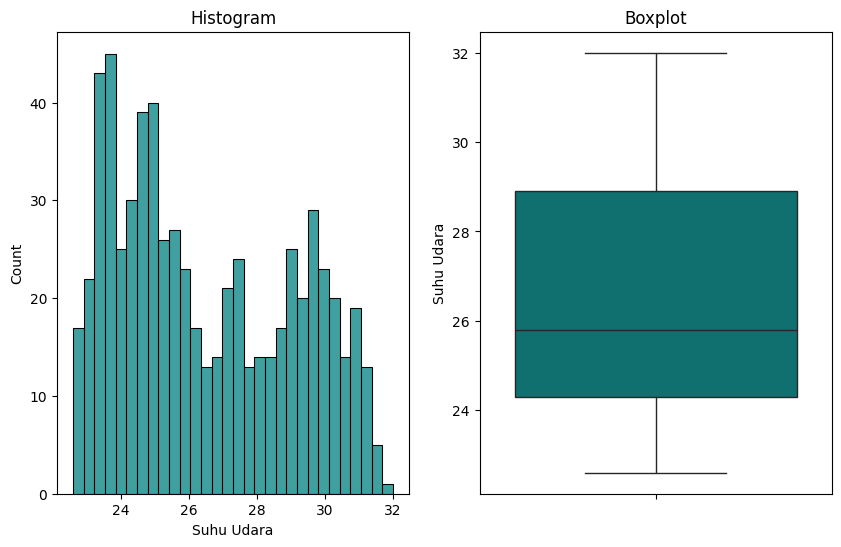


Suhu Udara - After Capping


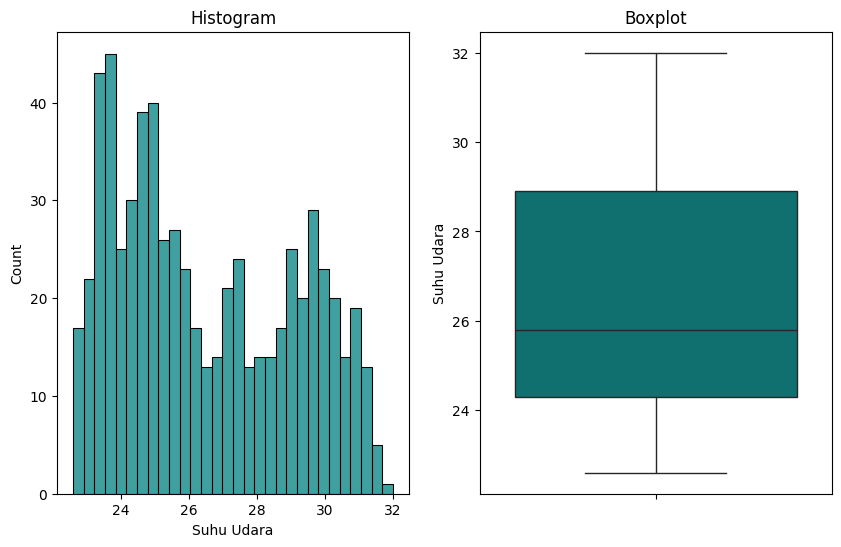

Kelembapan - Before Capping


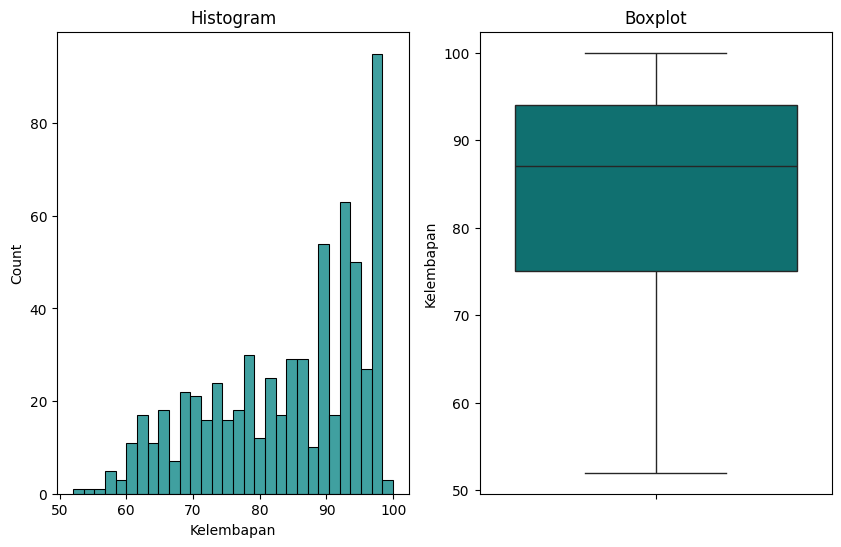


Kelembapan - After Capping


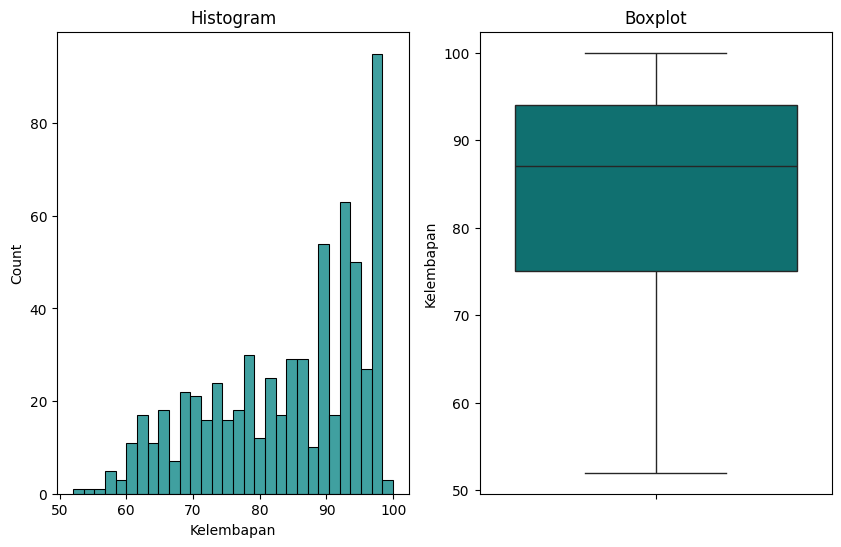

Kecepatan Angin - Before Capping


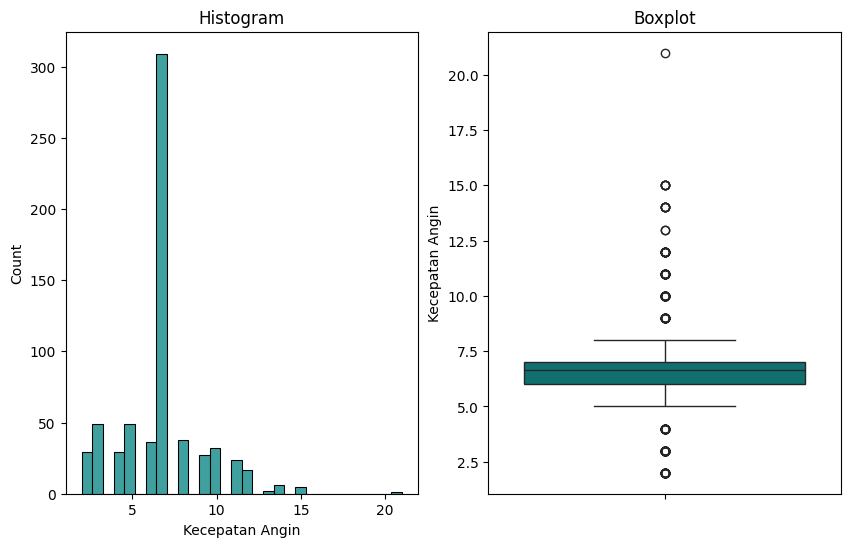


Kecepatan Angin - After Capping


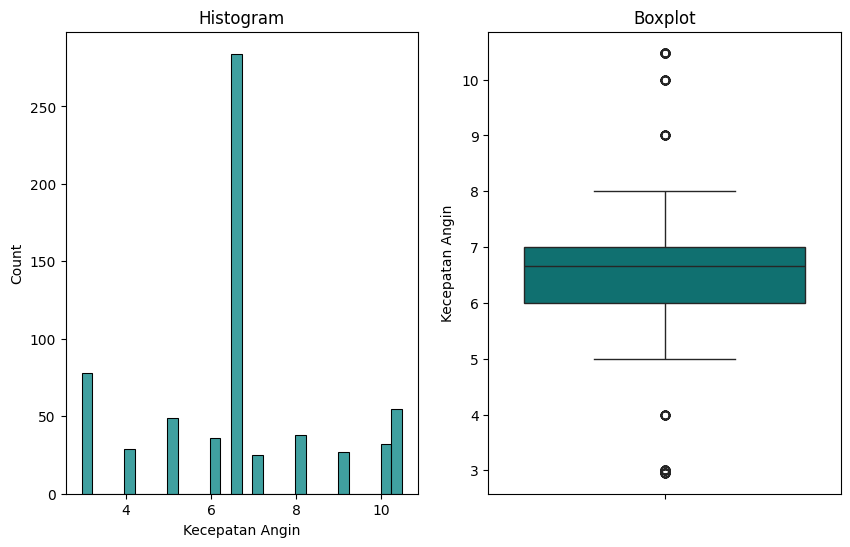

In [199]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


## E- Scaling

Pada tahap ini terlebih dahulu dieteksi skewness masing masing variabel. Pada data yang berdistribusi normal akann digunakan standar scaler dan pada variabel yang berdistribusi miring akan digunakan power transformer Yeo Johnson agar data mendekati distribusi normal.

In [200]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara', 'Kecepatan Angin']


In [201]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [202]:
#melakukan scalling menggunakan power transformer
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer .fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = power_transformer .transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = power_transformer .transform(X_test_capped[nilai_skew])

In [203]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

In [204]:
X_train_scale

,Suhu Udara,Kelembapan,Kecepatan Angin,Keadaan_Cuaca_reduced
163,-1.287608,1.269224,0.020306,6
252,0.345860,-0.345839,-1.264563,0
228,0.345860,-0.828814,-0.296681,0
297,1.240378,-0.971537,1.872710,0
93,-0.782011,0.437788,0.020306,0
...,...,...,...,...
621,-1.443177,1.141543,0.020306,0
498,-0.470874,0.124124,0.020306,0
327,-1.132040,1.269224,0.187260,6
329,-1.132040,1.016899,0.020306,2


## F- Encoding

Proses ini bertujuan untuk mengubah variabel kategorik 'Keadaan_Cuaca_reduced' menjadi bentuk numerik menggunakan metode One-Hot Encoding.

### One Hot Encoder

In [205]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

## G- Balancing Data

In [206]:
y_train

,Hujan
163,2
252,2
228,2
297,2
93,2
...,...
621,2
498,2
327,1
329,2


In [207]:
y_train.value_counts()

,count
Hujan,
2,509
1,144


Pada tahap ini dilakukan proses balancing data menggunakan metode SMOTE (Synthetic Minority Oversampling Technique) untuk mengatasi ketidakseimbangan kelas pada variabel target. Sebelum dilakukan balancing, jumlah data pada kelas mayoritas adalah 509, sedangkan kelas minoritas hanya 144. Setelah dilakukan resampling dengan SMOTE, kedua kelas memiliki jumlah data yang sama, yaitu 509. Dengan demikian, model akan memiliki kemampuan klasifikasi yang lebih seimbang.

In [208]:


smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train_balanced.value_counts()

# Cek hasilnya
print(y_train_balanced.value_counts())

Hujan
2    509
1    509
Name: count, dtype: int64


# _Training Model_

In [209]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [210]:
X_train.head(10)

,Suhu Udara,Kelembapan,Kecepatan Angin,Keadaan_Cuaca_reduced
163,23.2,97,6.655012,6
252,27.4,82,4.000000,0
228,27.4,76,6.000000,0
297,29.7,74,11.000000,0
93,24.5,90,6.655012,0
418,29.2,74,9.000000,0
429,24.3,93,6.655012,0
379,25.6,92,6.655012,0
604,30.0,69,7.000000,0
316,29.0,77,9.000000,0


In [211]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [212]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [213]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.51      0.12      0.20       144
           2       0.80      0.97      0.87       509

    accuracy                           0.78       653
   macro avg       0.66      0.55      0.54       653
weighted avg       0.73      0.78      0.72       653

              precision    recall  f1-score   support

           1       0.75      0.15      0.25        20
           2       0.80      0.99      0.88        70

    accuracy                           0.80        90
   macro avg       0.78      0.57      0.57        90
weighted avg       0.79      0.80      0.74        90



In [214]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.58      0.26      0.36       144
           2       0.82      0.95      0.88       509

    accuracy                           0.79       653
   macro avg       0.70      0.60      0.62       653
weighted avg       0.77      0.79      0.76       653

              precision    recall  f1-score   support

           1       0.71      0.25      0.37        20
           2       0.82      0.97      0.89        70

    accuracy                           0.81        90
   macro avg       0.77      0.61      0.63        90
weighted avg       0.80      0.81      0.77        90



In [215]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.79      0.42      0.55       509
           2       0.60      0.89      0.72       509

    accuracy                           0.65      1018
   macro avg       0.70      0.65      0.63      1018
weighted avg       0.70      0.65      0.63      1018

              precision    recall  f1-score   support

           1       0.69      0.45      0.55        20
           2       0.86      0.94      0.90        70

    accuracy                           0.83        90
   macro avg       0.77      0.70      0.72        90
weighted avg       0.82      0.83      0.82        90






interpretasi:


> **Model 1** dilatih tanpa teknik dilakukan feature engineering dapat dilihat menunjukkan performa yang buruk pada data uji. Akurasinya adalah 80% tetapi nilai Recall pada kelas 1 adalag 0.15 dan F1-Score sebesarkan 0.25 yang meningdikasikan bahwa model gagal mengidentifikasi sebesar 85% dari total data.

> **Model 2** menunjukkan sedikit kebaikan setalah dilakukan handling outlier dan scaling. Pada data uji, Recall Kelas 1 meningkat menjadi 0.25 dengan F1-Score 0.37. Walaupun ada peningkatan, model ini masih gagal menemukan 75% data kelas minoritas.

> **Model 3** dilatih menggunakan data yang telah diseimbangkan melalui resampling. Model ini menunjukkan peningkatan performa yang paling signifikan dan seimbang pada data uji. Recall untuk Kelas 1 melonjak drastis ke 0.45, dengan F1-Score 0.55. Selain itu, model ini juga mencapai akurasi tertinggi yaitu, 83% dan F1-Score rata-rata/macro avg F1-score 0.72 yang merupakan tertinggi di antara ketiganya.










# Kesimpulan

Proses feature engineering diimplementasikan untuk memastikan kesiapan dan kebersihan dataset sebelum digunakan dalam pemodelan machine learning. Tahapan awal meliputi imputasi untuk menangani nilai yang hilang, diikuti dengan pembagian dataset menjadi 88% data latih dan 12% data uji untuk validasi model yang objektif.

Selanjutnya, analisis distribusi dan skewness dilakukan untuk memahami sebaran data. Berdasarkan analisis ini, variabel numerik seperti 'Kecepatan Angin' yang terdistribusi mendekati normal, ditangani outlier-nya dengan capping Gaussian. Selanjutnya, transformasi Yeo-Johnson dan standardisasi diterapkan untuk menyeragamkan skala dan rentang nilai antar fitur.

Pada variabel kategorik 'Keadaan Cuaca', diterapkan reduksi kardinalitas yang dilanjutkan dengan One-Hot Encoding untuk mengubahnya menjadi format numerik. Selain itu, masalah ketidakseimbangan kelas pada variabel target 'Hujan' diatasi dengan teknik oversampling SMOTE untuk menciptakan proporsi kelas yang seimbang.
Rangkaian proses ini menghasilkan dataset yang telah bersih, seimbang, dan terstandarisasi, sehingga menciptakan fondasi yang solid bagi model machine learning untuk mencapai akurasi dan performa yang optimal.

# Referensi



1.   Han, J., Kamber, M., & Pei, J. (2012). Data Mining: Concepts and Techniques (3rd ed.). Morgan Kaufmann.
2. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.
3. Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.
4. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
5. Fikri Baharuddin, & Aris Tjahjanto. (2022). Peningkatan Performa Klasifikasi Machine Learning Melalui Perbandingan Metode Machine Learning dan Peningkatan Dataset. Jurnal SISFOKOM (Sistem Informasi dan Komputer), 11(1), 25–31.